---
title: Plane Waves and Math Review - Homework 01
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

This is the first homework assignment for *Lasers and Optomechanics* at Syracuse University.\
**It is due January 23, 2026**

**<span style="color:#ff5555;">You will need to complete the questions in this jupyter notebook and submit it via `gitlab`</span>**

### <span style="color: #ff9900;">Tech References</span>
1. [Jupyter notebook tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
2. [Latex reference](https://www.overleaf.com/learn/latex/Mathematical_expressions)
3. [Markdown Cheat Sheet](https://support.squarespace.com/hc/en-us/articles/206543587-Markdown-cheat-sheet)


In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": True,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

# <span style="color:#ffaaff;">Approximations Review</span>
In this course, you will need to remember and use some basic approximations.
These approximations all come from taking the [*Taylor Expansion*](https://en.wikipedia.org/wiki/Taylor_series) of a function $f(x)$ about some point $x = a$:
$$f(x)\Bigr|_{x \rightarrow a} \approx f(a) + f'(a) (x-a) + \dfrac{1}{2!} f''(a) (x-a)^2 = \displaystyle \sum_{n=0}^\infty \dfrac{f^{(n)}(a)}{n!}(x - a)^n$$


## <span style="color: #ff5500">Question 1: Binomial Approximation</a>
The binomial approximation to first order in $x$ is as follows:
\begin{align}
(1 + x)^{n} \approx 1 + n x.
\end{align}

### <span style="color:#ccccff;">Question 1A</span>
Derive the binomial approximation using the Taylor Expansion to first order about $x = 0$

### <span style="color:#ccccff;">Question 1B</span>
Find the second and third order terms of the binomial approximation

### <span style="color:#ccccff;">Question 1C</span>
Plot the binomial function on $x \in [-1, 1]$ for $n = \dfrac{1}{2}$.\
Compare to plots of the first, second, and third order binomial approximation.\
At what $x > 0$ does each approximation fail, becoming greater than 5\% error?

### Question 1A Solution: <span style="color:#ff5555;">(This would be the cell you fill out)</span>
Let $$f(x) = (1 + x)^n,$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = n (1 + x)^{n-1}$$
and the derivative evaluated at $x = 0$ is $$f'(0) = n$$

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x\\~\\
&= 1 + n x
\end{align}

### Question 1B Solution:
Taking the second and third derivatives, and evaluating at 0 yields
\begin{align}
f''(x) &= n (n-1) (1 + x)^{n-2} \\
f'''(x) &= n (n-1) (n-2) (1 + x)^{n-3} \\~\\
f''(0) &= n (n-1)\\
f''(0) &= n (n-1) (n-2)
\end{align}

The second order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2
\end{align}

The third order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2 + \dfrac{1}{3!} f'''(0) x^3\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2 + \dfrac{1}{6} n (n-1) (n-2) x^3
\end{align}

In [2]:
def binom(xx:float, nn:float):
    """Binomial function (1 + xx)^nn
    
    Inputs:
    -------
    xx: float or array of floats
        binomial variable
    nn: float
        binomial exponent

    Output:
    -------
    binom: float or array of floats
        binomial expansion
    """
    return (1 + xx)**nn

In [3]:
# Parameter definitions.  Protip: never make single-letter variable names
nn = 0.5
xx = np.linspace(-1, 2, 100)

taylor0 = 1
taylor1 = taylor0 + nn * xx
taylor2 = taylor1 + 0.5 * nn * (nn - 1) * xx**2
taylor3 = taylor2 + (1/6) * nn * (nn - 1) * (nn - 2) * xx**3

In [4]:
# At which x does the error become greater than 10%?
# First, we divide the approximation by the real function,
# Second, we subtract 1 from that ratio
# Third, we take the absolute value of the subtraction
# Fourth, we look for the first location where the final result is greater than 0.1
# Fifth, we find where x > 0
# Sixth, we take the intersection of the indices found
# Seventh, we find the first index where the error is large for plotting
error = 0.05
model = binom(xx, nn)

xx_errors = np.array([])
for taylor in [taylor1, taylor2, taylor3]:
    abs_errors = np.abs(taylor/model - 1) # final result
    indices_error = np.argwhere(abs_errors > error)
    indices_x = np.argwhere(xx > 0)
    
    indices_final = np.intersect1d(indices_error, indices_x)
    index = indices_final[0]
    
    xx_errors = np.append(xx_errors, xx[index])
print(xx_errors)

[0.87878788 1.3030303  1.42424242]


/var/folders/t1/fq8mx5mj0bx4kn1hlgb4hh840000gn/T/ipykernel_46996/3003632814.py:14: RuntimeWarning: divide by zero encountered in divide
  abs_errors = np.abs(taylor/model - 1) # final result


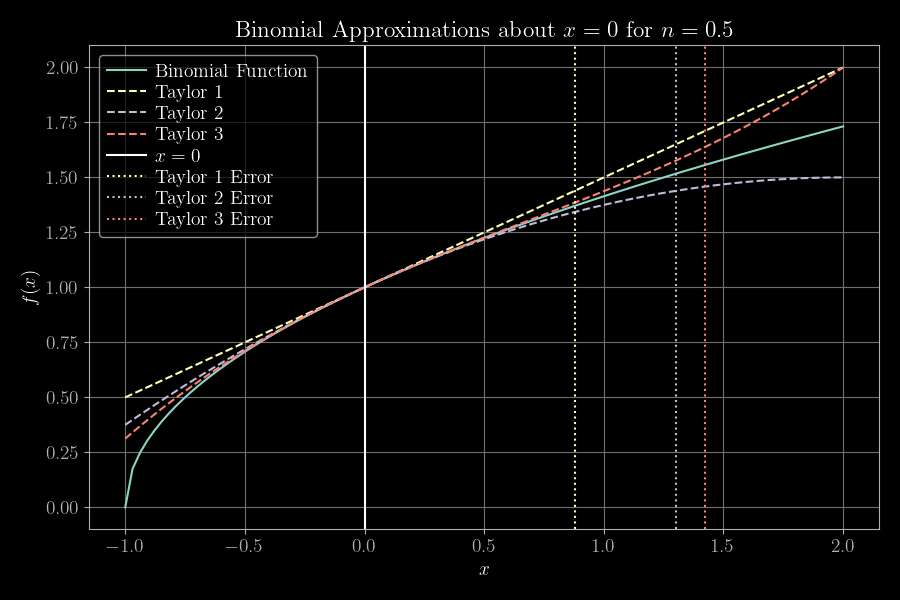

In [5]:
fig, s1 = plt.subplots(1)

s1.plot(xx, binom(xx, nn), label="Binomial Function")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=f"$x = 0$")

for ii, xx_error in enumerate(xx_errors):
    s1.axvline(x=xx_error, color=f"C{ii+1}",ls=":", label=f"Taylor {ii+1} Error")

s1.set_title("Binomial Approximations about $x = 0$ for $n = " + f"{nn}" + "$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

## <span style="color: #ff5500">Question 2: Sine and Cosine Approximations</a>

Repeat the Taylor Expansion approximations for\
A. sine and\
B. cosine\
to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.

### <span style="color:#ccccff;">Question 2A Solution: Sine Approximation</span>
Set $f(x) = \sin(x)$,
then 
$$ f'(x) = \cos(x), \quad f''(x) = -\sin(x) $$
Evaluating the Taylor Series about $x=0$:
\begin{align}
\sin{x} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\
\sin{x} &\approx 0 + x + 0\\
\sin{x} &\approx x 
\end{align}

In [6]:
# Changing the plotting parameter from x -> yy
yy = np.linspace(-np.pi, np.pi, 100)

taylor_sine1 = yy
taylor_sine3 = taylor_sine1 - yy**3 / 6

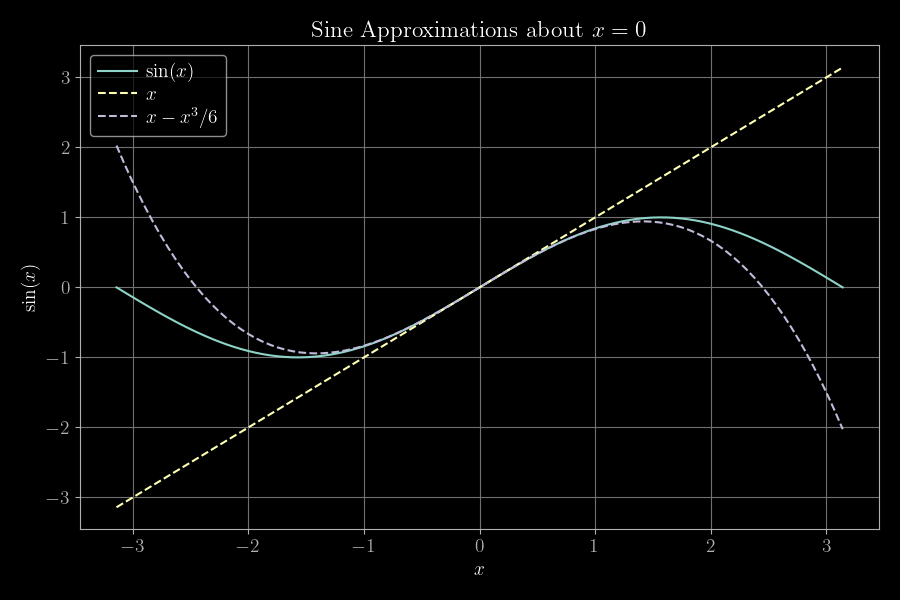

In [7]:
fig, s1 = plt.subplots(1)

s1.plot(yy, np.sin(yy), label=r"$ \sin(x) $")
s1.plot(yy, taylor_sine1, ls="--", label=r"$x$")
s1.plot(yy, taylor_sine3, ls="--", label=r"$x - x^3/6$")

s1.set_title("Sine Approximations about $x = 0$")
s1.set_xlabel("$x$")
s1.set_ylabel(r"$\sin(x)$")
s1.legend()
s1.grid()
plt.show()

### <span style="color:#ccccff;">Question 2B Solution: Cosine Approximation</span>
Set $f(x) = \cos(x)$,
then 
$$ f'(x) = -\sin(x), \quad f''(x) = -\cos(x) $$
Evaluating the Taylor Series about $x=0$:
\begin{align}
\cos{x} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\
\cos{x} &\approx 1 + 0 + \dfrac{x^2}{2}\\
\cos{x} &\approx 1 + \dfrac{x^2}{2}
\end{align}

In [8]:
# Changing the plotting parameter from x -> yy
zz = np.linspace(-np.pi, np.pi, 100)

taylor_cosine0 = np.ones_like(zz)
taylor_cosine2 = taylor_cosine0 - zz**2 / 2

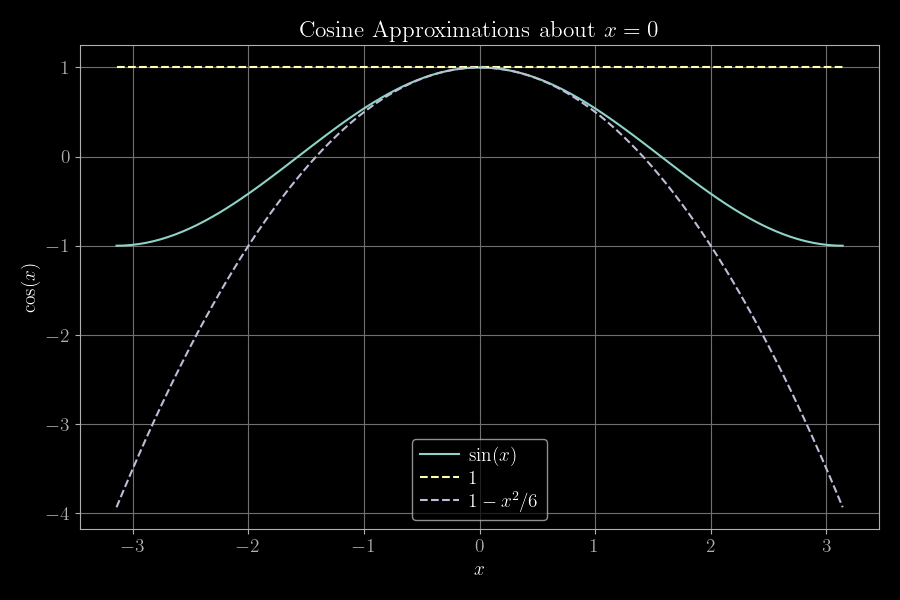

In [9]:
fig, s1 = plt.subplots(1)

s1.plot(zz, np.cos(yy), label=r"$ \sin(x) $")
s1.plot(zz, taylor_cosine0, ls="--", label=r"$1$")
s1.plot(zz, taylor_cosine2, ls="--", label=r"$1 - x^2/6$")

s1.set_title("Cosine Approximations about $x = 0$")
s1.set_xlabel("$x$")
s1.set_ylabel(r"$\cos(x)$")
s1.legend()
s1.grid()
plt.show()

## <span style="color: #ff5500">Question 3: Complex Number Review</a>

### Question 3A:
Plot the following complex function on a domain of $\phi \in [0, 2 \pi]$:
\begin{align}
z_1(\phi) &= 2 + e^{i \phi}\\
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}}\\
z_3(\phi) &= e^{(\sigma + i \omega) t}
\end{align}
where for $z_4$, $\sigma = -0.5$, and $\omega = 1$.

### Question 3B:
Calculate the magnitude $r(\phi)$ and argument $\theta(\phi)$ for each $z_i$.

### Question 3C:
Calculate the velocity of the phasors with respect to $\phi$, and draw them for each $z_i$ evaluated at $\phi = \left\{0, \dfrac{\pi}{2}, \pi, \dfrac{3\pi}{2} \right\}$

### Question 3D:
What is the primary difference between $z_1$ and $z_2$?

### Question 3E:
For $z_3$, substitute $t$ for $\phi$, and calculate the normalized time derivatives : $\dfrac{\dot{z_3}}{z_3}$, $\dfrac{\ddot{z_3}}{z_3}$

and find expressions for the normalized real polar coordinates $\dfrac{\dot{r}}{r}, \dfrac{\ddot{r}}{r}, \dot{\theta}, \ddot{\theta}$.

Discuss how the expressions you found for the polar coordinates relate to the path you plotted for $z_3$ in part A.  

What happens if $\sigma = +0.5$?

In [10]:
# For Part A, define the complex functions for plotting
def z1(phi):
    return 2 + np.exp(1j * phi)

def z2(phi):
    return 3 /(2 - np.exp(1j * phi))

def z3(phi, sigma=-0.5, omega=1):
    return np.exp((sigma + 1j * omega) * phi)

In [11]:
# For Part C, define the derivatives of the complex functions for plotting
def dz1(phi):
    return 1j * np.exp(1j * phi)

def dz2(phi):
    return 3 * 1j * np.exp(1j * phi) / (2 - np.exp(1j * phi))**2

def dz3(phi, sigma=-0.5, omega=1):
    return (sigma + 1j * omega) * np.exp((sigma + 1j * omega) * phi)

In [12]:
phis = np.linspace(0, 2*np.pi, 100)
aa = 2
bb = 1

sigma = -0.5
omega = 1

# Make convenient ploting vectors
plot_z1_re = np.real(z1(phis))
plot_z1_im = np.imag(z1(phis))
plot_z2_re = np.real(z2(phis))
plot_z2_im = np.imag(z2(phis))
plot_z3_re = np.real(z3(phis, sigma, omega))
plot_z3_im = np.imag(z3(phis, sigma, omega))

### Question 3A Solution

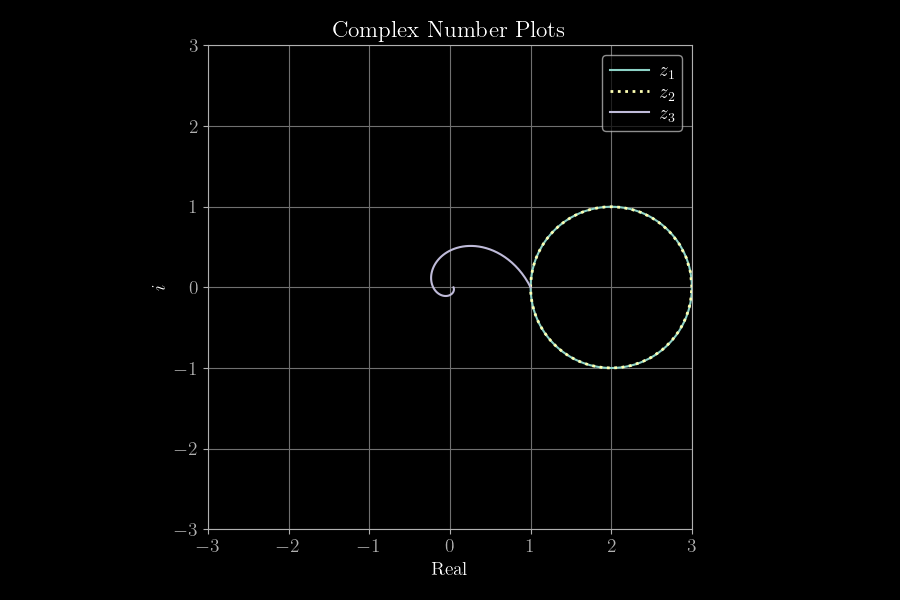

In [13]:
fig, s1 = plt.subplots(1)

line1, = s1.plot(plot_z1_re, plot_z1_im, label=r"$ z_1 $")
line2, = s1.plot(plot_z2_re, plot_z2_im, lw=2, ls=":", label=r"$ z_2 $")
line3, = s1.plot(plot_z3_re, plot_z3_im, ls="-", label=r"$ z_3 $")

s1.set_xlim([-3,3])
s1.set_ylim([-3,3])

s1.set_aspect('equal')

s1.set_title("Complex Number Plots")
s1.set_xlabel("Real")
s1.set_ylabel(r"$i$")
s1.legend()
s1.grid()
plt.show()

### Question 3B Solution:

$z_1$:
\begin{align}
z_1(\phi) &= 2 + e^{i \phi}\\
z_1(\phi) &= 2 + \cos\phi + i \sin\phi
\end{align}

\begin{align}
r_1(\phi) &= \sqrt{z_1 z_1^*}\\
r_1(\phi) &= \sqrt{(2 + e^{i \phi})(2 + e^{-i \phi})}\\
r_1(\phi) &= \sqrt{ 5 + 4 \cos\phi }\\
\theta_1(\phi) &= \arctan2(\sin\phi, 2 + \cos\phi)
\end{align}

$z_2$:
\begin{align}
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}}\\
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}} \dfrac{ 2 - e^{-i \phi} }{ 2 - e^{-i \phi} }\\
z_2(\phi) &= \dfrac{ 3 (2 - e^{-i \phi}) }{ 5 - 4 \cos\phi }\\
z_2(\phi) &= \dfrac{ 6 - 3 \cos\phi }{ 5 - 4 \cos\phi } + i \dfrac{ 3 \sin\phi }{ 5 - 4 \cos\phi }
\end{align}

\begin{align}
r_2(\phi) &= \sqrt{z_2 z_2^*}\\
r_2(\phi) &= \sqrt{\left( \dfrac{3}{2 - e^{i \phi}} \right)\left( \dfrac{3}{2 - e^{-i \phi}} \right)}\\
r_2(\phi) &= \sqrt{ \dfrac{9}{5 - 4 \cos\phi } }\\
\theta_2(\phi) &= \arctan2\left(\dfrac{ 3 \sin\phi }{ 5 - 4 \cos\phi }, \dfrac{ 6 - 3 \cos\phi }{ 5 - 4 \cos\phi }\right)
\end{align}

$z_3$:
\begin{align}
z_3(\phi) &= e^{(\sigma + i \omega) \phi}\\
z_3(\phi) &= e^{\sigma \phi} e^{i \omega \phi}\\
z_3(\phi) &= e^{\sigma \phi} \cos(\omega \phi) + i e^{\sigma \phi} \sin(\omega \phi)
\end{align}

\begin{align}
r_3(\phi) &= \sqrt{z_3 z_3^*}\\
r_3(\phi) &= \sqrt{ (e^{\sigma \phi} e^{i \omega \phi}) (e^{\sigma \phi} e^{-i \omega \phi}) }\\
r_3(\phi) &= e^{\sigma \phi}\\
\theta_3(\phi) &= \arctan2(\sin(\omega \phi), \cos(\omega \phi))\\
\theta_3(\phi) &= \omega \phi
\end{align}


### Question 3C Solution

\begin{align}
\dfrac{dz_1}{d\phi} &= ie^{i\phi}\\

\dfrac{dz_2}{d\phi} &= \dfrac{3ie^{i\phi}}{(2-e^{i\phi})^2}\\

\dfrac{dz_3}{d\phi} &= (\sigma + i\omega) e^{(\sigma + i\omega)\phi}
\end{align}

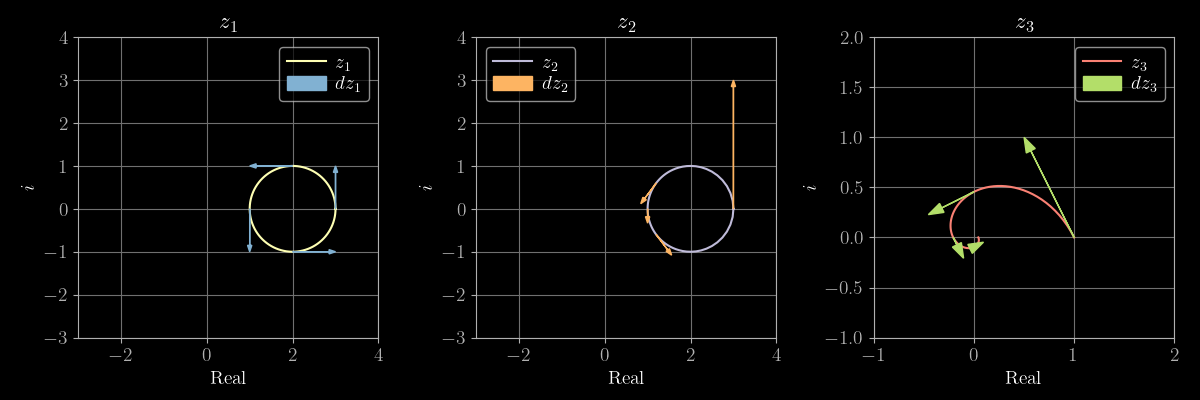

In [14]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(12,4))

for ii, func, dfunc, ax in zip(np.arange(1,4),[z1,z2,z3],[dz1,dz2,dz3],[ax1,ax2,ax3]):
    text = f"$ z_{ii} $"
    dtext = f"$ dz_{ii} $"
    color = f"C{ii}"

    zz_re = np.real(func(phis))
    zz_im = np.imag(func(phis))

    line1, = ax.plot(zz_re, zz_im, color=color, label=text)
    
    for phi in np.linspace(0, 3*np.pi/2, 4):
        zz0 = func(phi)
        dz0 = dfunc(phi)
        ax.arrow(np.real(zz0), np.imag(zz0), np.real(dz0), np.imag(dz0), shape='full', color=f"C{ii+3}", lw=1, length_includes_head=True, head_width=.10, zorder=2, label=dtext)
        dtext = ""

    if ii < 3:
        ax.set_xlim([-3,4])
        ax.set_ylim([-3,4])
    else:
        ax.set_xlim([-1,2])
        ax.set_ylim([-1,2])        
    
    ax.set_aspect('equal')
    
    ax.set_title(text)
    ax.set_xlabel("Real")
    ax.set_ylabel(r"$i$")
    ax.legend()
    ax.grid()
plt.show()

### Question 3D Solution

The primary difference between $z_1$ and $z_2$ is the evolution rate, i.e. their derivatives.
Both $z_1$ and $z_2$ trace out perfect circles centered at $z_0 = 2$ with radius $r_0 = 1$.  
However, the rate at which the circles are traced out are vastly different, which can be seen in the velocities plotted in the solution to Question 3C.

$z_1$ traces out the circle at a constant velocity. 
$z_2$ starts fast at $\phi = 0$, and slows down immediately, yielding a minimum velocity at $\phi = \pi$.

### Question 3E Solution

Subbing in $\phi \rightarrow t$, and taking the time derivatives:
\begin{align}
z_3(t) &= e^{(\sigma + i \omega) t}\\~\\
\dot{z_3}(t) &= (\sigma + i \omega)e^{(\sigma + i \omega) t}\\~\\
\ddot{z_3}(t) &= (\sigma + i \omega)^2 e^{(\sigma + i \omega) t}
\end{align}
which implies
\begin{align}
\dfrac{\dot{z_3}}{z_3} &= \sigma + i \omega\\~\\
\dfrac{\ddot{z_3}}{z_3} &= (\sigma + i \omega)^2 = \sigma^2 - \omega^2 + i 2 \sigma \omega
\end{align}

Recalling from class the generalized time-derivative expressions for polar coordinates:
\begin{align}
\dfrac{\dot{z}}{z} &= \dfrac{\dot{r}}{r} + i \dot{\theta}\\
\dfrac{\ddot{z}}{z} &= \left[ \dfrac{\ddot{r}}{r} - \dot{\theta}^2 \right] + i \left[ \ddot{\theta} + \dfrac{2 \dot{\theta} \dot{r}}{r} \right]
\end{align}

We can see a direct relation between the real and imaginary parts of the above equations:
\begin{align}
\label{eq:z_3_polar_time_derivatives}
\dfrac{\dot{r_3}}{r_3} &= \sigma\\
\dot{\theta_3} &= \omega\\
\dfrac{\ddot{r_3}}{r_3} &= \sigma^2\\
\ddot{\theta_3} &= 0
\end{align}

This can also be seen in another way:
\begin{align}
z_3(t) &= r_3(t) e^{i \theta_3(t) }\\~\\
z_3(t) &= e^{(\sigma + i \omega) t}\\
z_3(t) &= e^{\sigma t} e^{i \omega t}\\~\\
\rightarrow r_3(t) &= e^{\sigma t}, \quad \theta_3(t) = \omega t
\end{align}
then taking the derivatives from there.

From the polar derivatives in Eq. [](#eq:z_3_polar_time_derivatives), we can make some statements about the evolution of the path traced by $z_3$ over time.
First, the sign of $\sigma$ is of paramount importance to whether $r_3$ decays to zero or grows to infinity.

If $\sigma > 0$, then $r_3$ grows to infinity.

If $\sigma < 0$, then $r_3$ decays to zero.

If $\sigma = 0$, then $r_3$ remains constant, and $z_3$ proceeds in an infinite circle.

For the angular term, $\omega$ is simply the angular frequency of the oscillations intrinsic to $z_3$.

A negative $\omega$ term is possible here, it flips the propogation of the spiral from counterclockwise to clockwise.

A negative $\omega$ has no impact on the decay rate $\dot{r_3}$.
It does flip the sign of the angular acceleration term $2 \sigma \omega$, which is necessary to ensure decay for a negative $\sigma$ or growth for a positive $\sigma$.


## <span style="color: #ff5500">Question 4: Electric field propogating in 2D</a>
In class, we assumed that an plane wave was propogating in the $\hat{k} = \hat{z}$ direction, with the electric field oscillating in the $\hat{x}$ direction.
Suppose now that the is oscillating in the $\dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})$ direction: 
\begin{align}
\boldsymbol{E} = E_0 \cos(\vec{k} \cdot \vec{r} - \omega t) \dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})
\end{align}

### Question 4A:
What direction of propogation $\hat{k}$ and magnetic field vector $\boldsymbol{B}$ are now possible?\
Draw a diagram of the electric field vector and the plane of propogation.

### Question 4B:
What are the expressions for $\hat{k}$ and $\boldsymbol{B}$ if we constrain the direction of propogating to be (partially) in the positive $\hat{x}$ direction? 

### <span style="color:#ccccff;">Question 4A Solution</span>

The electric field oscillates in the $\hat{n} = \dfrac{1}{\sqrt{2}}(\hat{x} + \hat{y})$ direction.

The direction of propogation of the wave must be perpendicular to that vector, in other words, anywhere in the plane normal to $\hat{n}$.

The equation for a plane is $$A (x - x_0) + B (y - y_0) + C (z - z_0) = 0,$$
where $\vec{p} = \{x_0, y_0, z_0\}$ is a point in the plane, and $\hat{n} = \{A, B, C\}$ is the normal vector out of the plane.

We set  $\vec{p} = \{0, 0, 0\}$ for simplicity, and $\hat{n} = \dfrac{1}{\sqrt{2}}\{1, 1, 0\}$,
then solve.
We find that $$ y = - \dfrac{A}{B} x = - x$$ for all $z$,
so the plane of propogation is simply $$ x - y = 0 \quad \forall z.$$

The diagram of this solution is plotted below.

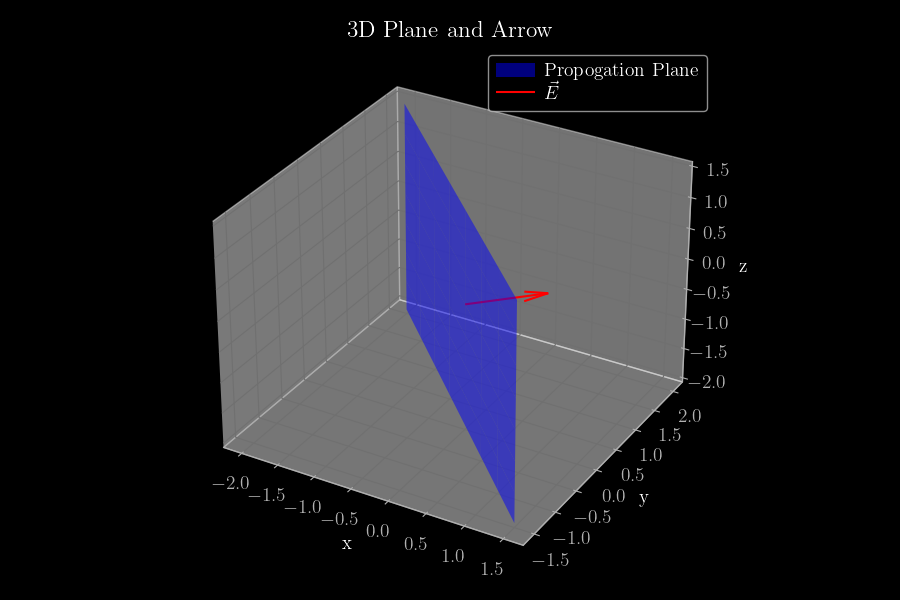

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Define the plane (e.g., normal vector and a point)
normal = 1/np.sqrt(2)*np.array([1, 1, 0])
point = np.array([0, 0, 0])

# Create a meshgrid for the plane
size = 2
xx, zz = np.meshgrid(np.arange(-size, size, 0.5), np.arange(-size, size, 0.5))

# Calculate the Z values for the plane
# Equation of a plane: ax + by + cz = d, where d = normal . point
d = np.dot(normal, point)
yy = -normal[1] / normal[0] * xx

# Plot the plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='blue',label="Propogation Plane")

ax.quiver(0, 0, 0, normal[0], normal[1], normal[2], length=1.0, normalize=False, color='red', label=r"$\vec{E}$")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Plane and Arrow')
ax.legend()

# ax.set_axis_off()

plt.show()

### <span style="color:#ccccff;">Question 4B Solution</span>

If we constrain the wave to propogate in the positive $\hat{x}$ direction, then from our result above,
$$\hat{k} = \dfrac{1}{\sqrt{2}} (\hat{x} - \hat{y}).$$
And since we know that 
$$\boldsymbol{B} = \dfrac{1}{c}(\hat{k} \times \boldsymbol{E})$$
we can calculate the curl of the field like
\begin{align} 

\begin{vmatrix}
 \hat{x} & \hat{y} & \hat{z} \\[6pt]
 \dfrac{1}{\sqrt{2}} & -\dfrac{1}{\sqrt{2}} & 0 \\[12pt]
 \dfrac{1}{\sqrt{2}} & \dfrac{1}{\sqrt{2}} & 0
\end{vmatrix}
\end{align}

which comes out to be exactly equal to $+\hat{z}$:

$$\boldsymbol{B} = \dfrac{E_0}{c}\cos{(\vec{k} \cdot \vec{r} - \omega t)} \hat{z}$$

## <span style="color: #ff5500">Question 5: Spherical Plane Wave Intensity and Radiation Pressure</a>

Suppose you have a sinusoidal spherical plane wave source a distance $d$ away along the $\hat{z}$ axis from a cylindrical mirror with radius $a$.\
Use the center of the spherical wave as the origin, and the distance from that center as the variable $r$.\
Assume that the cylinder is in the $xy$ plane.\
Also assume that the spherical wave is emitting total power $P_\mathrm{total}$ in all directions.


### Question 5A:
What is the Poynting vector $\boldsymbol{S}$ for the spherical waves?\
*Hint: Equation 9.49 of Griffith's E&M may be helpful here*

### Question 5B:
What is the Poynting vector $\boldsymbol{S}$ incident on the mirror center?\
What about the mirror edge?\
Write an expression for the Poynting vector incident anywhere on the mirror's surface.

### Question 5C:
Using your result from Question 5B, find the intensity $I$ incident on the mirror.

### Question 5D:
Find the total power $P$ incident on the mirror.\
Compare to the total power emitted by the spherical plane wave.

### Question 5E: 
Calculate the radiation pressure $p_\mathrm{rad}$ incident on the mirror.\
Also find the radiation pressure force $F_\mathrm{rad}$.\
Assume the mirror is a perfect reflector.\
If the mirror has a mass $m$, what is its acceleration?

## Question 5A Solution
First, we consider the direction the wave is propogating in.
A spherical wave is conveniently propogating in the radial $\hat{r}$ direction.
For ease of the next few questions, we define the $\hat{r}$ vector with respect to two angles $\theta, \phi$,
such that if $\theta = 0$ and $\phi = 0$, $\hat{r} = \hat{z}$:
\begin{align}
\label{eq:r_hat}
\hat{r} = \cos\theta \cos\phi~\hat{z} + \cos\theta \sin\phi~\hat{x} + \sin\theta~\hat{y}
\end{align}
From this definition, if $\theta = 0$ and $\phi = \dfrac{\pi}{2}$, $\hat{r} = \hat{x}$\
and if $\theta = \dfrac{\pi}{2}$, $\hat{r} = \hat{y}$.

Next, we write what the electric and magnetic fields are for a sinusoidal spherical plane wave.
The electric field will be polarized in some $\hat{n}$ direction, which must be orthogonal to the radial direction $\hat{r}$.
We don't bother to define $\hat{n}$, although we could using Eq. [](#eq:r_hat).
\begin{align}
\boldsymbol{E} &= \dfrac{E_0}{r} \cos(\boldsymbol{k} \cdot \boldsymbol{r} - \omega t) \hat{n}\\
\boldsymbol{B} &= \dfrac{E_0}{c r} \cos(\boldsymbol{k} \cdot \boldsymbol{r} - \omega t) (\hat{r} \times \hat{n})
\end{align}
where the magnetic field direction $(\hat{r} \times \hat{n})$ is just the remaining orthogonal direction to $\hat{r}$ and $\hat{n}$.
We also note that the phase term $\boldsymbol{k} \cdot \boldsymbol{r} = k r$, since $\hat{k} = \hat{r}$.

Then the Poynting vector $\boldsymbol{S}$ becomes 
\begin{align}
\boldsymbol{S} &= \dfrac{1}{\mu_0} (\boldsymbol{E} \times \boldsymbol{B})\\
\boldsymbol{S} &= \dfrac{1}{\mu_0} \left( \left(\dfrac{E_0}{r} \cos(\boldsymbol{k} \cdot \boldsymbol{r} - \omega t) \hat{n} \right) \times \left( \dfrac{E_0}{c r} \cos(\boldsymbol{k} \cdot \boldsymbol{r} - \omega t) (\hat{r} \times \hat{n})\right) \right)\\
\boldsymbol{S} &= \dfrac{E_0^2}{c \mu_0} \dfrac{1}{r^2} \cos(k r - \omega t)^2 (\hat{n} \times (\hat{r} \times \hat{n}))\\
\boldsymbol{S} &= \epsilon_0 E_0^2 \dfrac{1}{r^2} \cos(k r - \omega t)^2 (\hat{n} \times (\hat{r} \times \hat{n}))
\end{align}
where we've used that $c^2 = \dfrac{1}{\epsilon_0 \mu_0}$ in the last line.

Remembering BAC CAB:
\begin{align}
\boldsymbol{A} \times (\boldsymbol{B} \times \boldsymbol{C}) = \boldsymbol{B}(\boldsymbol{A} \cdot \boldsymbol{C}) - \boldsymbol{C}(\boldsymbol{A} \cdot \boldsymbol{B})
\end{align}
yields our solution
\begin{align}
\label{eq:poynting_vector_question_5a}
\boxed{ \boldsymbol{S} = \epsilon_0 E_0^2 \dfrac{1}{r^2} \cos(k r - \omega t)^2 \hat{r} }
\end{align}

In [16]:
%load_ext jupyter_tikz

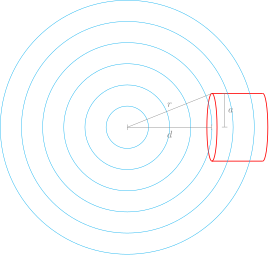

In [18]:
%%tikz
\begin{tikzpicture}[scale=1.5]
  % Define parameters
  \def\r{4}        % wavefront radius
  \def\d{2}        % distance to cylinder center
  \def\a{0.8}      % cylinder radius
  
  % Wavefront center at origin
  \coordinate (O) at (0, 0);
  \coordinate (C) at (\d, 0);  % cylinder center
  
  % Draw cylinder with front ellipse (facing origin) and back ellipse
  % Front ellipse (facing toward origin)
  \draw[red, thick] (C) ellipse ({0.15*\a} and {\a});
  
  % Back ellipse (receded, smaller horizontal scale)
  \draw[red, thick] (\d + 1.2, -\a) arc(-90:90:{0.15*\a} and {\a});
  % \draw[red, dashed, thick] (\d + 1.2, -\a) -- (\d + 1.2, \a);  % hidden edge (dashed)
  
  % Connecting lines (top and bottom)
  \draw[red, thick] (\d, \a) -- (\d + 1.2, \a);
  \draw[red, thick] (\d, -\a) -- (\d + 1.2, -\a);
  
  % Draw concentric spherical wavefronts (circular contours)
  \draw[cyan, thin] (0, 0) circle (0.5);
  \draw[cyan, thin] (0, 0) circle (1.0);
  \draw[cyan, thin] (0, 0) circle (1.5);
  \draw[cyan, thin] (0, 0) circle (2.0);
  \draw[cyan, thin] (0, 0) circle (2.5);
  \draw[cyan, thin] (0, 0) circle (3.0);

  % Mark origin
  \filldraw[white] (O) circle (2pt);
  \node[white, below left] at (O) {O};
  
  % Mark cylinder center
  \filldraw[white] (C) circle (1pt);
  
  % Add dimension labels
  \draw[|-|, gray, thin] (0, 0) -- (\d, 0);
  \node[below, gray] at (\d/2, 0) {$d$};
  
  \draw[|-|, gray, thin] (\d + 0.3, 0) -- (\d + 0.3, \a);
  \node[right, gray] at (\d + 0.3, \a/2) {$a$};
  
  % Label wavefront radius
  \draw[gray, thin] (0, 0) -- (\d, \a);
  \node[above, gray] at (\d/2, \a/2) {$r$};
  
\end{tikzpicture}


## Question 5B Solution
At the center of the cylinder, $\vec{r} = d \hat{z}$.\
At the edge of the cyclinder in the y-direction, $\vec{r} = d \hat{z} + a \hat{y}$.\
We can generally write the magnitude of the $\vec{r} = r \hat{r}$ as
$$r = \sqrt{d^2 + x^2 + y^2}.$$
for any location $(x,y)$ on the mirror's surface.

This yields
\begin{align}
\mathrm{Center:}& \qquad \boldsymbol{S}(r = d) = \epsilon_0 E_0^2 \dfrac{1}{d^2} \cos(k d - \omega t)^2 \hat{z} \\~\\
\mathrm{Mirror~Edge:}& \qquad \boldsymbol{S}(r = \sqrt{d^2 + a^2}) = \epsilon_0 E_0^2 \dfrac{1}{d^2 + a^2} \cos(k \sqrt{d^2 + a^2} - \omega t)^2 (\dfrac{d}{r} \hat{z} + \dfrac{a}{r} \hat{y})\\~\\
\mathrm{Anywhere~on~Mirror~Surface:}& \qquad \boldsymbol{S}(r = \sqrt{d^2 + x^2 + y^2}) = \epsilon_0 E_0^2 \dfrac{1}{d^2 + x^2 + y^2} \cos(k \sqrt{d^2 + x^2 + y^2} - \omega t)^2 (\dfrac{d}{r} \hat{z} + \dfrac{y}{r} \hat{y} + \dfrac{x}{r} \hat{x})
\end{align}

This means we have a Poynting vector which oscillates spatially across the mirror surface.\
These spatial wave front oscillations are very important for raw phase estimates, and are strongly related to the *Gouy Phase Accumulation*, which will become imporant when calculate higher order mode resonance conditions in optical cavities.

## Question 5C Solution
For the intensity $I$ anywhere on the mirror's surface $(x,y)$,
we take our final Poynting vector magnitude $S$ and integrate over one phase cycle in time $t$.

To find the Poynting vector magnitude $S$, we identify the normal vector to the cylinder surface as $\hat{z}$,\
then isolate the $\hat{z}$ direction by dotting with the Poynting vector $\boldsymbol{S}$ for Anywhere on the Mirror Surface:
\begin{align}
S &= \boldsymbol{S} \cdot \hat{z}\\
S &= \epsilon_0 E_0^2 \dfrac{d}{r^3} \cos(k r - \omega t)^2 
\end{align}
This appropriately scales for the power incident on mirror at an angle $\hat{r} \cdot \hat{z} = \cos\theta \cos\phi = \dfrac{d}{r}$.

Now calculating the intensity over the surface $I(x,y)$
\begin{align}
I(x,y) &= \langle S \rangle\\
I(x,y) &= \dfrac{1}{T} \int_0^{T} \epsilon_0 E_0^2 \epsilon_0 E_0^2 \dfrac{d}{r^3} \cos(k r - \omega t)^2  dt\\
I(x,y) &= \dfrac{1}{2} \epsilon_0 E_0^2 \dfrac{d}{r^3}\\
I(x,y) &= \dfrac{1}{2} \epsilon_0 E_0^2 \dfrac{d}{(d^2 + x^2 + y^2)^{3/2}}
\end{align}

The intensity peaks at $x = 0$ and $y = 0$, the nearest locations to the center of the cylinder.

## Question 5D Solution
The power incident on the mirror $P$ is the double integral over the mirror surface out to radius $a$:
\begin{align}
P = \int \int I(x,y) dx dy
\end{align}

We define a radius on the mirror surface 
$$\vec{s} = x \hat{x} + y \hat{y}, \text{where}~s^2 = x^2 + y^2,~\text{and}~dx dy = s ds d\varphi$$
to make our integral easier.

$I(x,y)$ will become a single variable $I(s)$:
\begin{align}
I(x,y) &= \dfrac{1}{2} \epsilon_0 E_0^2 \dfrac{d}{(d^2 + x^2 + y^2)^{3/2}}\\
I(s) &= \dfrac{1}{2} \epsilon_0 E_0^2 \dfrac{d}{(d^2 + s^2)^{3/2}}
\end{align}
For the power $P$ calculation, we have 
\begin{align}
P &= \int_0^{2\pi} \int_0^{a} I(s)~s ds d\varphi\\
P &= 2\pi \int_0^{a} I(s)~s ds\\
P &= 2\pi \int_0^{a} \dfrac{1}{2} \epsilon_0 E_0^2 \dfrac{s d}{(d^2 + s^2)^{3/2}}~ds\\
P &= \pi \epsilon_0 E_0^2 d \int_0^{a} \dfrac{s}{(d^2 + s^2)^{3/2}}~ds\\
P &= \pi \epsilon_0 E_0^2 d \left[ \dfrac{1}{d} - \dfrac{1}{\sqrt{d^2 + a^2}} \right] \\
\end{align}
\begin{align}
\boxed{ P = \pi \epsilon_0 E_0^2 \left[ 1 - \dfrac{d}{\sqrt{d^2 + a^2}} \right] }
\end{align}

If we let the cylinder radius $a$ go to infinity, then the right hand term goes to zero and we recover
$$\boxed{ P(a\rightarrow\infty) = \pi \epsilon_0 E_0^2 }$$

To get the total power $P_\mathrm{total}$,
we integrate [](#eq:poynting_vector_question_5a) over one cycle $T$ to get total intensity $I_\mathrm{total}(r)$,
then spatially over a spherical surface.
\begin{align}
I_\mathrm{total}(r) &= \langle \boldsymbol{S} \cdot \hat{r} \rangle\\
I_\mathrm{total}(r) &= \dfrac{1}{T} \int_0^{T} \epsilon_0 E_0^2 \dfrac{1}{r^2} \cos(k r - \omega t)^2  dt\\
I_\mathrm{total}(r) &= \dfrac{1}{2} \epsilon_0 E_0^2 \dfrac{1}{r^2}
\end{align}
The power calculation is then a double integral over a sphere's surface: $dA = r^2 \sin\theta d\theta d\phi$
\begin{align}
P_\mathrm{total} &= \int I_\mathrm{total}(r) dA\\
P_\mathrm{total} &= \int_{0}^{2\pi} \int_{0}^{\pi} \dfrac{1}{2} \epsilon_0 E_0^2 \dfrac{1}{r^2} r^2 \sin\theta d\theta d\phi \\
P_\mathrm{total} &= \dfrac{1}{2} \epsilon_0 E_0^2 \int_{0}^{2\pi} \int_{0}^{\pi} \sin\theta d\theta d\phi \\
P_\mathrm{total} &= \dfrac{1}{2} \epsilon_0 E_0^2 (2 \pi) (2)
\end{align}
which gives us our total power
\begin{align}
\boxed{ P_\mathrm{total} = 2 \pi \epsilon_0 E_0^2 }
\end{align}

This makes sense: we should catch half of the power as we let the radius of the cylinder go to infinity, and we have 
\begin{align}
\dfrac{P(a\rightarrow\infty)}{P_\mathrm{total}} &= \dfrac{\pi \epsilon_0 E_0^2}{2 \pi \epsilon_0 E_0^2}\\
\dfrac{P(a\rightarrow\infty)}{P_\mathrm{total}} &= \dfrac{1}{2}
\end{align}

## Question 5E Solution
For the radiation pressure, we have
\begin{align}
p_\mathrm{rad} &= 2 \dfrac{I}{c}\\
p_\mathrm{rad}(s) &= \dfrac{1}{c} \epsilon_0 E_0^2 \dfrac{d}{(d^2 + s^2)^{3/2}}
\end{align}
where the additional factor of 2 comes from the reflection off the mirror.

For the force calculation $F_\mathrm{rad}$, we use the power incident on the mirror $P$:
\begin{align}
F_\mathrm{rad} &= \dfrac{2 P}{c}\\
F_\mathrm{rad} &= \dfrac{2}{c} \pi \epsilon_0 E_0^2 \left[ 1 - \dfrac{d}{\sqrt{d^2 + a^2}} \right]
\end{align}

The acceleration of the mirror 
\begin{align}
a_\mathrm{rad} &= \dfrac{F_\mathrm{rad}}{m}\\
a_\mathrm{rad} &= \dfrac{2}{c m} \pi \epsilon_0 E_0^2 \left[ 1 - \dfrac{d}{\sqrt{d^2 + a^2}} \right]
\end{align}
